# Demos of features of the morpc python package

# Introduction

The MORPC data team maintains a package with contains commonly-used constants, mappings, and functions to allow for code-reuse in multiple scripts.  The package documentation and code is available at the [morpc-py](https://github.com/morpc/morpc-py) repository in GitHub.  

This package is still in development but will contain the following modules:

  - morpc - Main library.  Includes contents which are broadly applicable for MORPC's work, including MORPC branding, region definitions and utilities, and general purpose data manipulation functions.
  - morpc.frictionless -  Functions and classes for working with metadata, including schemas, resources, and data packages. These are for internal processes that us the [frictionless-py](https://github.com/frictionlessdata/frictionless-py/tree/main) package. Frictionless was implemented roughly 2025 to manage all metadata and to develop workflow documentation. 
  - morpc.census - Constants and functions that are relevant when working with Census data, including decennial census, ACS, and PEP.

# Installation

Install via pip.

In [ ]:
# !pip install morpc --upgrade

## Import morpc package 

In [ ]:
import morpc

# Conversion factors

As of Jan 2024, the following commonly used conversion factors are available in the library. Review the https://github.com/morpc/morpc-py/blob/main/morpc/morpc.py to see if others are available.

## Area

Square feet per acre

In [ ]:
morpc.CONST_SQFT_PER_ACRE

## Region definitions

The following lists represent various definitions for "Central Ohio" based on collections of counties.

In [ ]:
for name in morpc.CONST_REGIONS.keys():
    print("Region name: {}".format(name))
    print("Counties in region: {}\n".format(morpc.CONST_REGIONS[name]))

## County three-letter abbreviations

Map each MORPC county name to its three-letter abbreviation.

In [ ]:
morpc.CONST_COUNTY_ABBREV

Map each three-letter abbreviation back to its county name.

In [ ]:
morpc.CONST_COUNTY_EXPAND

Note that 'MRW' is the three-letter abbreviation for Morrow county that is used by ODOT. Sometimes it may be desired to use 'MOR' instead.  In that case, you can use the following code to update both mappings.

In [ ]:
morpc.CONST_COUNTY_ABBREV["Morrow"] = 'MOR'
morpc.CONST_COUNTY_EXPAND = {value: key for key, value in morpc.CONST_COUNTY_ABBREV.items()}

Now you can see the new mappings:

In [ ]:
print(morpc.CONST_COUNTY_ABBREV["Morrow"])
print(morpc.CONST_COUNTY_EXPAND["MOR"])

To revert to the old mapping you can either use a code block similar to the one above, or simply reload the library:

In [ ]:
import importlib
importlib.reload(morpc)

Now the original mappings are restored.

In [ ]:
print(morpc.CONST_COUNTY_ABBREV["Morrow"])
print(morpc.CONST_COUNTY_EXPAND["MRW"])

# County identifiers (GEOID)

Map each MORPC county name to its five-character Census GEOID.  Note that the IDs are strings.  They are not integers and should not be handled as such.

In [ ]:
morpc.CONST_COUNTY_NAME_TO_ID

Map each GEOID back to its county name.

In [ ]:
morpc.CONST_COUNTY_ID_TO_NAME

# Summary level identifiers.

Summary level lookups for geographic jurisdictions. The summary levels include the Census sumlevel numbers, as well as some morpc summary levels, beginning with "M"

In [ ]:
morpc.SUMLEVEL_LOOKUP

In [ ]:
morpc.HIERARCHY_STRING_LOOKUP

# countyLookup() Class 

## List counties and convert between county names and codes (Central Ohio, Ohio, or U.S.)

The library includes a Python class called `countyLookup`. Upon instantiation, this object is pre-loaded with a dataframe describing a set of counties whose scope is specified by the user.  The object includes methods for listing the counties by their names or GEOIDs and for two-way conversion between name and GEOID.

  - `scope="morpc"`     Default. Loads only the counties in the MORPC 15-county region (see `CONST_REGIONS['15-County Region']` above)
  - `scope="corpo"`     Loads only the counties in the CORPO region (see `CONST_REGIONS['CORPO Region']` above)
  - `scope="ohio"`      Loads all counties in Ohio
  - `scope="us"`      Loads all counties in the United States

*NOTE: As of Jan 2024, some methods are not supported for scope="us".  See details below.*

You can create an object containing the MORPC 15 counties as follows:

In [ ]:
countyLookup = morpc.countyLookup()

Or if you prefer to be explicit:

In [ ]:
countyLookup = morpc.countyLookup(scope="morpc")

Either way, the object is populated with the following dataframe.

In [ ]:
countyLookup.df

You can create a list of the names of the counties:

In [ ]:
countyLookup.list_names()

Or list their IDs:

In [ ]:
countyLookup.list_ids()

You can also look up the ID for a county given its name.

In [ ]:
countyLookup.get_id("Hocking")

Or look up its name given its ID.

In [ ]:
countyLookup.get_name("39091")

# varLookup() class

Standard variable lookup class

Reads the list of "standard" variables from a lookup table.  Provides dataframe access to the list of variables, as well as an alias cross-reference table.

In [ ]:
## PLACEHOLDER FOR EXAMPLES

# Write data and charts to Excel

Excel-based charts are exceptionally useful to our customers because they are easy for our customers to manipulate, style, and include in downstream products such as PowerPoint slides.  They are, however, inconvenient to product programmatically.  The following functions are intended to simplify the production of Excel-based charts that are consistent with MORPC branding and, eventually, with Data & Mapping visualization standards.

### data_chart_to_excel( )

This function will create an Excel worksheet consisting of the contents of a pandas dataframe (as a formatted table) and, optionally, a chart to visualize the series included in the dataframe.  The simplest invocation will produce a table and a basic column (vertical bar) chart with default formatting that is consistent with MORPC branding guidelines, however the user can specify many of options supported by the xlsxwriter library (https://xlsxwriter.readthedocs.io/).

The following blocks demonstrates some simple use cases.  First, create a dataframe with demonstration data.

In [ ]:
import pandas as pd
import os
import morpc

In [ ]:
d = {'col1': [1, 2, 3, 4], 'col2':[3, 4, 5, 6]}
df = pd.DataFrame(data=d)
df

Next create an Excel object using the xlsxwriter package.  The object is linked to an Excel workbook, as indicated by the path in the first argument.

In [ ]:
# Create a directory to store the output (for demonstration purposes only)
if not os.path.exists("./temp_data"):
    os.makedirs("./temp_data")

writer = pd.ExcelWriter("./temp_data/dataChartToExcelOutput.xlsx", engine='xlsxwriter')

The following block will create a new worksheet in the Excel object which contains a table representing the dataframe and column chart displaying the series in the table.  The new worksheet will be called "Sheet1" since no sheet name was specified.  Default presentation settings will be used since we did not specify any settings.  This will result in a column (vertical bar) chart.

**Note: You will not be able to view the spreadsheet itself until the writer object is closed in a later block.**

In [ ]:
morpc.data_chart_to_excel(df, writer)  

The following block will add another worksheet to the xlsxwriter object.  This time we specified a sheet name ("LineChart") and a chart type ("line"), so the code will create the same table as the previous command but will produce a line chart instead of a column chart.  As before, the default presentation settings will be used.

In [ ]:
morpc.data_chart_to_excel(df, writer, sheet_name="LineChart", chartType="line")

The following block goes a step further and specifies a subtype for the chart.  Specifically it creates a stacked column chart.  As before, the default presentation settings will be used.  For more information about what chart types and subtypes are available, see https://xlsxwriter.readthedocs.io/workbook.html#workbook-add-chart.  The supported chart types as of this writing include column, bar, and line.  The stacked subtype has been minimally tested for column and bar charts.  Other chart types and subtypes may or may not work without further improvements to the function.

In [ ]:
morpc.data_chart_to_excel(df, writer, sheet_name="Stacked", chartType="column", chartOptions={"subtype":"stacked"})

The next block demonstrates the "bar" (horiztontal bar) chart type and applies some custom presentation settings, specifically a set of user-specified colors and titles, and omission of the legend, which is displayed by default.

In [ ]:
morpc.data_chart_to_excel(df, writer, sheet_name="Custom", chartType="bar", chartOptions={
    "colors": ["cyan","magenta"],                   # Specify a custom color
    "hideLegend": True,                             # Hide the legend
    "titles": {                                     # Specify the chart title and axis titles
        "chartTitle": "My Chart",
        "xTitle": "My independent variable",
        "yTitle": "My dependent variable",
    }
})

Finally, we have to close the xlsxwriter object to finalize the Excel workbook and make it readable.

In [ ]:
writer.close()

Now you should be able to open the Excel document at `./temp_data/dataChartToExcelOutput.xlsx`

Note that many more customizations are possible.  To learn more, uncomment and run the following block, or enter the command in your own notebook or a Python interpreter.

In [ ]:
# help(morpc.data_chart_to_excel)

# Load spatial data

Often we want to make a copy of some input data and work with the copy, for example to protect the original data or to create an archival copy of it so that we can replicate the process later.  With tabular data this is simple, but with spatial data it can be tricky.  Shapefiles actually consist of up to six files, so it is necessary to copy them all.  Geodatabases may contain many layers in addition to the one we care about.  The `load_spatial_data()` function simplifies the process of reading the data and (optionally) making an archival copy. It has three parameters:
  - `sourcePath` - The path to the geospatial data. It may be a file path or URL. In the case of a Shapefile, this should point to the .shp file or a zipped file that contains all of the Shapefile components. You can point to other zipped contents as well, but see caveats below.
  - `layerName` (required for GPKG and GDB, optional for SHP) - The name of the layer that you wish to extract from a GeoPackage or File Geodatabase.  Not required for Shapefiles, but may be specified for use in the archival copy (see below)
  - `driverName` (required for zipped data or data with non-standard file extension) - which [GDAL driver](https://gdal.org/drivers/vector/index.html) to use to read the file. Script will attempt to infer this from the file extension, but you must specify it if the data is zipped, if the file extension is non-standard, or if the extension cannot be determined from the path (e.g. if the path is an API query)
  - `archiveDir` (optional) - The path to the directory where a copy of a data should be archived.  If this is specified, the data will be archived in this location as a GeoPackage.  The function will determine the file name and layer name from the specified parameters, using generic values if necessary.
  - `archiveFileName` (optional) - If `archiveDir` is specified, you may use this to specify the name of the archival GeoPackage.  Omit the extension.  If this is unspecified, the function will assign the file name automatically using a generic value if necessary.
  
The following example loads data from the MORPC Mid-Ohio Open Data website, however you can also load data from a local path or network drive.

In [ ]:
import geopandas as gpd

In [ ]:
# Create a directory to store the archival data (for demonstration purposes only)
if not os.path.exists("./temp_data"):
    os.makedirs("./temp_data")

# Load the data and create an archival copy
gdf = morpc.load_spatial_data(
    sourcePath="https://opendata.arcgis.com/api/v3/datasets/e42b50fbd17a47739c2a7695778c498e_17/downloads/data?format=shp&spatialRefId=3735&where=1%3D1", 
    layerName="MORPC MPO Boundary",
    driverName="ESRI Shapefile",
    archiveDir="./temp_data"
)

Let's take a look at the data and make sure it loaded correctly.

In [ ]:
gdf.drop(columns="Updated").explore() ## avoid datetime column JSON error

Now let's read the archival copy and make sure it looks the same.  We'll use the `load_spatial_data()` function again, but this time we won't make an archival copy.

In [ ]:
gdfArchive = morpc.load_spatial_data("./temp_data/MORPC MPO Boundary.gpkg", layerName="MORPC MPO Boundary")

In [ ]:
gdfArchive.drop(columns="Updated").explore()

# Assign geographic identifiers

Sometimes we have a set of locations and we would like to know what geography (county, zipcode, etc.) they fall in. The `assign_geo_identifiers()` function takes a set of georeference points and a list of geography levels and determines for each level which area each point falls in.  The function takes two parameters:
  - `points` - a GeoPandas GeoDataFrame consisting of the points of interest
  - `geographies` - A Python list of one or more strings in which each element corresponds to a geography level. You can specify as many levels as you want from the following list, however note that the function must download the polygons and perform the analysis for each level so if you specify many levels it may take a long time.
    - "county" - County (Census TIGER)
    - "tract" - *Not currently implemented*
    - "blockgroup" - *Not currently implemented*
    - "block" - *Not currently implemented*
    - "zcta" - *Not currently implemented*
    - "place" - Census place (Census TIGER)
    - "placecombo" - *Not currently implemented*
    - "juris" - *Not currently implemented*
    - "region15County" - *Not currently implemented*
    - "region10County" - *Not currently implemented*
    - "regionCORPO" - *Not currently implemented*
    - "regionMPO" - *Not currently implemented*

**NOTE:** Many of the geography levels are not currently implemented.  They are being implemented as they are needed.  If you need one that has not yet been implemented, please contact Adam Porr (or implement it yourself).

In the following example, we will assign labels for the "county" and "place" geography levels to libraries in MORPC's Points of Interest layer.  First we'll download just the library locations from Mid-Ohio Open Data using the ArcGIS REST API.

In [ ]:
url = "https://services1.arcgis.com/EjjnBtwS9ivTGI8x/arcgis/rest/services/Points_of_Interest/FeatureServer/0/query?outFields=*&where=%22type%22=%27Library%27&f=geojson"
librariesRaw = gpd.read_file(url)

The data incudes a bunch of fields that we don't need.  For clarity, extract only the relevant fields.

In [ ]:
libraries = librariesRaw.copy().filter(items=['NAME', 'ADDRESS','geometry'], axis="columns")

In [ ]:
libraries.head()

Let's take a look at the library locations.

In [ ]:
libraries.explore(style_kwds={"radius":4})

Use the `assign_geo_identifiers()` function to iterate through the requested geography levels (in this case "county" and "place"), labeling each point with the identifier of the geography in each level where the point is located.

In [ ]:
librariesEnriched = morpc.assign_geo_identifiers(libraries, ["county","place"])

Note that two columns have been added to the dataframe, one that contains the identifier for the county the library is located in and one that contains the identifier for the place.  

In [ ]:
librariesEnriched.head()

Let's take a look at libraries, symbolizing each according to the county where it is located.

In [ ]:
librariesEnriched.explore(column="id_county", style_kwds={"radius":4})

Let's take another look, this time symbolizing each library according to the place where it is located.  The legend has been suppressed because there are too many unique values, but you can hover over each point to see the place identifier that has been assigned to it.

In [ ]:
librariesEnriched.explore(column="id_place", style_kwds={"radius":4}, legend=False)

# morpc.frictionless - Schema tools (TableSchema)

As of January 2024 the Data Team is considering a new standard for machine-readable metadata, namely [TableSchema](https://specs.frictionlessdata.io/table-schema/).  TableSchema is a schema for tabular formats that includes many of the features for Avro (see above) plus rich types and constraints. TableSchema is supported in [Python](https://pypi.org/project/tableschema/) and [R](https://www.rdocumentation.org/packages/tableschema.r/), and the libraries include many utilty functions.

The foundation of the morpc.frictionless is [frictionless-py](https://github.com/frictionlessdata/frictionless-py). The functions are written to create and load resources. 

The foundation of the frictionless framework are [resouces](https://framework.frictionlessdata.io/docs/resources/file.html). Resources are structured json or yaml files that include metadata for the a file or number of files. 

In [ ]:
df = pd.read_excel('./temp_data/dataChartToExcelOutput.xlsx') ## import sample data from temp_data

In [ ]:
df.columns = ["column1", "column2", "column3"] ## give some reasonable names to columns

In [ ]:
df.to_csv('./temp_data/temp_df.csv', index=False) ## save a csv

Typically we will create some constant variable name for the file, resource, and schema. The resource and schema are stored in yaml files. 

In [ ]:
RESOURCE_DIR = './temp_data/'
TABLE_FILE_NAME = 'temp_df.csv'
TABLE_RESOURCE_NAME = TABLE_FILE_NAME.replace('.csv', '.resource.yaml')
TABLE_SCHEMA_NAME = TABLE_FILE_NAME.replace('.csv', '.schema.yaml')

Schema can be defined manually, or can be created via standard frictionless functions. 

In [ ]:
import frictionless

In [ ]:
frictionless.Schema.describe(os.path.join(RESOURCE_DIR, TABLE_FILE_NAME)).to_yaml(os.path.join(RESOURCE_DIR, TABLE_SCHEMA_NAME)) ## Create a default schema and save as a yaml

### Create a resource

In [ ]:
morpc.frictionless.create_resource(TABLE_FILE_NAME, # the filename relative to resource dir, often just filename
                                   resourcePath=os.path.join(RESOURCE_DIR, TABLE_RESOURCE_NAME), # file path to resource location
                                   schemaPath=TABLE_SCHEMA_NAME, # path of schema relative to resource dir
                                   name = "temp_df", # simple name
                                   title = "A title for the resource", # A human readable title
                                   description = "A description of the resource to explain what it contains.", # A full description
                                   writeResource = True, # Boolean - Whether to archive the resouce file 
                                   resFormat = "csv",
                                   resMediaType= "text/csv",  
                                   computeBytes= True, # Compute the size if the file in bytes
                                   computeHash = True, # Create a md5 hash of the file, a unique string to check if file has been changed.
                                   validate=True # Validate the resource after creating
                                  )

Load data from a resource file. Returns the data, a resource, and the schema

### Load data from a resource file

In [ ]:
data, resource, schema = morpc.frictionless.load_data(os.path.join(RESOURCE_DIR, TABLE_RESOURCE_NAME))

In [ ]:
data

In [ ]:
resource

In [ ]:
schema

# Branding

In [3]:
import morpc
import yaml
import pandas as pd
import numpy as np

The library includes the hex codes the MORPC brand colors and provides assigns of human-readable names to make the colors easier to work with.

In [2]:
with open('../morpc/color/morpc_colors.yaml', 'r') as file:
    morpc_colors = yaml.safe_load(file)

NameError: name 'yaml' is not defined

In [4]:
def arc_points(start_angle_deg, end_angle_deg, radius=1.0, center=(0, 0), n_points=100):
    """
    Generate points along an arc.

    Parameters:
    - start_angle_deg (float): Start angle in degrees
    - end_angle_deg (float): End angle in degrees
    - radius (float): Radius of the arc
    - center (tuple): (x, y) center of the arc
    - n_points (int): Number of points along the arc

    Returns:
    - List of (x, y) points
    """
    angles = np.radians(np.linspace(start_angle_deg, end_angle_deg, n_points))
    cx, cy = center
    x = cx + radius * np.cos(angles)
    y = cy + radius * np.sin(angles)
    return x, y

In [54]:
import matplotlib.pyplot as plt
import colorsys
import pandas as pd

def plot_hls_dataframe(df):
    """
    Plot HLS colors from a DataFrame with 'hue', 'lum', and 'sat' columns.

    Parameters:
    - df (pd.DataFrame): DataFrame with columns ['hue', 'lum', 'sat'], all in range [0, 1]
    """
    if not all(col in df.columns for col in ['hue', 'lum', 'sat']):
        raise ValueError("DataFrame must contain 'hue', 'lum', and 'sat' columns")

    n = len(df)
    fig, ax = plt.subplots(figsize=(n, 1.5))
    ax.axis('off')

    for i, row in df.iterrows():
        h, l, s = row['hue'], row['lum'], row['sat']
        rgb = colorsys.hls_to_rgb(h, l, s)
        rect = plt.Rectangle((i, 0), 1, 1, color=rgb)
        ax.add_patch(rect)

    ax.set_xlim(0, n)
    ax.set_ylim(0, 1)
    plt.tight_layout()
    plt.show()

In [65]:
def arc_points(start_angle_deg, end_angle_deg, radius=1.0, center=(0, 0), n_points=100):
    angles = np.radians(np.linspace(start_angle_deg, end_angle_deg, n_points))
    cx, cy = center
    x = cx + radius * np.cos(angles)
    y = cy + radius * np.sin(angles)
    return x, y

In [74]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

def plot_parabolas_plotnine(a_values, x_range=(-1, 1), num_points=300):
    """
    Plot parabolas y = a * x^2 for different 'a' values using plotnine.

    Parameters:
    - a_values (list): List of 'a' coefficients
    - x_range (tuple): x-axis range
    - num_points (int): Number of points for each parabola
    """
    x = np.linspace(*x_range, num_points)
    data = []

    for a in a_values:
        y = a * x**2
        for xi, yi in zip(x, y):
            data.append({'x': xi, 'y': yi, 'a': f'a = {a}'})

    df = pd.DataFrame(data)

    plot = (
        ggplot(df, aes(x='x', y='y', color='a')) +
        geom_line(size=1) +
        labs(title="Parabolas with Varying Coefficients (a)",
             x='x', y='y') +
        theme_minimal()
    )

    return plot

In [79]:
def parabola(xs, a, h, k):
    ys = []
    for x in xs:
        y = a * (x - h)**2 + k 
        ys.append(y)
    return ys

In [80]:
parabola(np.linspace(0,1,12), 1, 1, 2)

[3.0,
 2.8264462809917354,
 2.6694214876033056,
 2.5289256198347108,
 2.4049586776859506,
 2.2975206611570247,
 2.206611570247934,
 2.1322314049586777,
 2.074380165289256,
 2.0330578512396693,
 2.0082644628099175,
 2.0]

In [58]:
scale = morpc.color.rgb_scale_from_hue(**morpc_colors['darkblue']['gradient'])
position = morpc_colors['darkblue']['gradient_pos']

NameError: name 'morpc_colors' is not defined

In [4]:
morpc_colors['darkgreen']['hex']

'#2c7f68'

In [42]:
morpc.color.hex_to_hls('#66b561')

(0.3234126984126984, 0.5450980392156863, 0.3620689655172415)

<Axes: xlabel='y'>

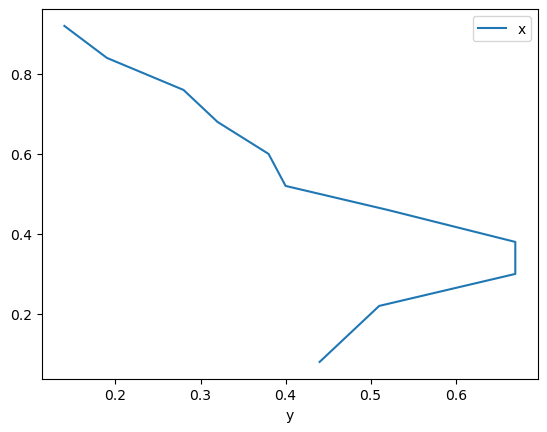

In [101]:
pd.DataFrame({"x": greys,
              "y": sats}).set_index('y').plot()

In [93]:
hue = .3234
greys = [.92, .84, .76, .68, .60, .52, .46, .38, .30, .22, .16, .08]
sats  = [.14, .19, .28, .32, .38, .40, .52, .67, .67, .51, .48, .44]

In [94]:
scale = morpc.color.rgb_scale_from_hue(hue, sats, greys)

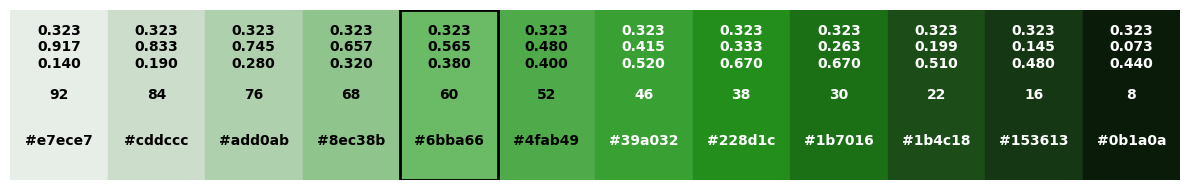

In [95]:
morpc.color.plot_rgb_squares_with_hex(scale, 5)

# Round preserving sum (aka "bucket rounding")

Imagine we have a series of values that need to be rounded, but we want the rounded values to sum to the same value as the original series.  Create a random series for demonstration purposes.

In [ ]:
rawValues = pd.Series([random.randrange(0, 100000)/100 for x in range(1,10)])
list(rawValues)

Specify the number of decimal digits to preserve. For this demo we'll round to integers (i.e. zero decimal places), which is typically what we want, but the function supports rounding to other decimal places as well.

In [ ]:
digits = 0

Perform bucket-rounding

In [ ]:
bucketRoundedValues = morpc.round_preserve_sum(rawValues, digits, verbose=True)

Raw values:

In [ ]:
rawValues.tolist()

Bucket-rounded values:

In [ ]:
bucketRoundedValues.tolist()

Sum of raw values:

In [ ]:
round(sum(rawValues))

Sum of bucket-rounded values:

In [ ]:
sum(bucketRoundedValues)

# Control variable to group

Often we have a set of values representing the members of some group and we need the sum of those values to match a total for the group that was computed independently. Perhaps the best known example of this is the annual [population estimates for sub-county jurisdictions](https://github.com/morpc/morpc-popest).  The estimates for all of the jurisdictions in the county must total to the [county-level population estimates](https://github.com/morpc/morpc-popest-county), which are derived independently.  In this case the county (group) totals are known as the "control values" or "control totals" and the process of adjusting the sub-county (group member) values so that their total is equal to the control total is known as "controlling" the variable.  The process includes the following steps, which will be described in more detail below.

  - Establish control values for the groups (e.g. the county-level estimnates in the example above)
  - Create a series of grouped values to be controlled (e.g. the sub-county estimates)
  - Control the values in each group to the control total.  This consists of three sub-parts:
    - Compute group sums
    - Compute group shares
    - Compute controlled values
  
In the sections that follow, we'll look at a more contrived example, namely controlling the 2021 ACS 5-year estimates for county subdivisions to the 2020 decennial county populations. This is not a recommended application and is used only for the sake of convenience.

### Establish control values for groups

Download county populations from 2020 decennial census

In [ ]:
r = requests.get(
    url="https://api.census.gov/data/2020/dec/dhc",
    params={
        "get":",".join(["P1_001N"]),
        "for":"county:{}".format(",".join([x[2:] for x in countyLookup.list_ids()])),
        "in": "state:39"
        }
)
records = r.json()
countyPop = pd.DataFrame.from_records(records[1:], columns=records[0])
countyPop["C_GEOID"] = countyPop["state"] + countyPop["county"]
countyPop = countyPop.loc[countyPop["county"].isin([x[2:] for x in countyLookup.list_ids()])].copy() \
    .rename(columns={"P1_001N":"C_POP"}) \
    .drop(columns={"state","county"}) \
    .astype({"C_POP":"int"}) \
    .set_index("C_GEOID")

Now we have the population for each county (indexed by their GEOIDs) which will serve as the control totals.

In [ ]:
countyPop.head()

### Create series of grouped values to be controlled

Download sub-county populations from the 2021 ACS 5-year estimates

In [ ]:
r = requests.get(
    url="https://api.census.gov/data/2021/acs/acs5",
    params={
        "get":",".join(["NAME","GEO_ID","B01001_001E","B01001_001M"]),
        "for":"county subdivision:*",
        "in": [
            "state:39",
            "county:{}".format(",".join([x[2:] for x in countyLookup.list_ids()])),
        ]
    }
)
records = r.json()
subdivPop = pd.DataFrame.from_records(records[1:], columns=records[0])
subdivPop = subdivPop \
    .rename(columns={"GEO_ID":"GEOID","B01001_001E":"POP","B01001_001M":"POP_MOE"}) \
    .astype({"POP":"int"}) \
    .set_index("GEOID")
subdivPop["C_GEOID"] = subdivPop["state"] + subdivPop["county"]

Now we have population estimates for the members of each group (county).  Note that the county GEOID (C_GEOID) has been assigned to each member record.  We'll use this to iterate through groups.

In [ ]:
subdivPop.head()

Note that the sums of the subdivision populations doesn't match the sum of the county populations. This is expected and it is the reason we need to control the subdivision values.

In [ ]:
subdivPop["POP"].sum()

In [ ]:
countyPop["C_POP"].sum()

### Control the values in each group to the control total

Recall that this step has three sub-parts:

  1. Compute group sums (see `morpc.compute_group_sum()`)
  2. Compute group shares (see `morpc.compute_group_share()`)
  3. Compute controlled values (see `morpc.compute_controlled_values()`)

The morpc-common library has a function for each of these steps as noted above, but it also has a high-level function that performs all three steps in sequence, namely `morpc.control_variable_to_group()`.  It requires the following inputs:

  - `inputDf` is a pandas DataFrame with a column containing the group shares and (optionally) a column containg the group labels.
  - `controlValues` is one of the following:
      - If `groupbyField == None`: `controlValues` is a scalar number (integer or float)
      - If `groupbyField != None`: `controlValues` is a pandas Series of numbers indexed by group labels
  - `groupbyField` (optional) is the name of the column of `inputDf` that contains the group labels.
  - `shareField` (optional) is the name of the column of `inputDf` containing the shares that the values comprise.  If this is not specified, "GROUP_SHARE" will be used.
  - `roundPreserveSumDigits` (optional) is the number of decimal places that the scaled values (i.e. the values in the "CONTROLLED_VALUE" column) should be rounded to. A "bucket rounding" technique (see `morpc.round_preserve_sum()` will be used to ensure that the sum of the values in the group is preserved. If this is not specified, the scaled values will be left unrounded.

This is what the function call looks like for our example case:

In [ ]:
subdivPopControlled = morpc.control_variable_to_group(inputDf=subdivPop, controlValues=countyPop["C_POP"], valueField="POP", groupbyField="C_GEOID", roundPreserveSumDigits=0)
subdivPopControlled.head()

### Check the results

Now the sum of our controlled values should match the county control totals.  We can see that this is true by comparing the "POP_SUM_CONTROLLED" columns (which the sum of "CONTROLLED_VALUE" by county) and the "C_POP" column (which is the county control total) and verifying that the two are equal for all records.

In [ ]:
subdivPopControlled[["C_GEOID","POP","CONTROLLED_VALUE"]] \
    .groupby("C_GEOID").sum() \
    .rename(columns={"POP":"POP_SUM","CONTROLLED_VALUE":"POP_SUM_CONTROLLED"}) \
    .join(countyPop)

We may want to get a sense of how much adjustment of the sub-county values was required. To do this we can compute the difference between the controlled value and the original value and do some desriptive analysis.

In [ ]:
subdivPopControlled["RESIDUAL"] = subdivPopControlled["CONTROLLED_VALUE"] - subdivPopControlled["POP"]
subdivPopControlled["RESIDUAL_PCT"] = subdivPopControlled["RESIDUAL"]/subdivPopControlled["POP"]
subdivPopControlled["RESIDUAL_PCT"] = subdivPopControlled["RESIDUAL_PCT"].replace(np.inf, 0)
subdivPopControlled["RESIDUAL_PCT"] = subdivPopControlled["RESIDUAL_PCT"].replace(-np.inf, 0)
subdivPopControlled["RESIDUAL_PCT"] = subdivPopControlled["RESIDUAL_PCT"].fillna(0)

First we'll look at the stats for the raw residual.

In [ ]:
subdivPopControlled["RESIDUAL"].describe()

In [ ]:
subdivPopControlled["RESIDUAL"].hist(bins=25, log=True)

The residual is close to zero in the vast majority of cases.  Let's look at the ten cases with the greatest residual.

In [ ]:
subdivPopControlled[["NAME","POP","CONTROLLED_VALUE","RESIDUAL","RESIDUAL_PCT"]].sort_values("RESIDUAL", ascending=False).head(10)

And the ten cases with the smallest residual (which could be large but negative)

In [ ]:
subdivPopControlled[["NAME","POP","CONTROLLED_VALUE","RESIDUAL","RESIDUAL_PCT"]].sort_values("RESIDUAL", ascending=False).tail(10)

The raw residual for Columbus was very large, but as a percentage it is not that bad.  Let's look at the stats for the percentages.

In [ ]:
subdivPopControlled["RESIDUAL_PCT"].describe()

In [ ]:
subdivPopControlled["RESIDUAL_PCT"].hist(bins=25)

In [ ]:
subdivPopControlled[["NAME","POP","CONTROLLED_VALUE","RESIDUAL","RESIDUAL_PCT"]].sort_values("RESIDUAL_PCT", ascending=False).head(10)

In [ ]:
subdivPopControlled[["NAME","POP","CONTROLLED_VALUE","RESIDUAL","RESIDUAL_PCT"]].sort_values("RESIDUAL_PCT", ascending=False).tail(10)

# morpc.census

MORPC works regularly with census data, including but not limited to ACS 5 and 1-year, Decennial Census, PEP, and geographies. The following module is useful for gathering and organizing census data for processes in various workflow. Those workflows are linked when appropriate. 

### ACS functions and variables

acs_get() is a low-level wrapper for Census API requests that returns the results as a pandas dataframe. If necessary, it splits the request into several smaller requests to bypass the 50-variable limit imposed by the API.  

The resulting dataframe is indexed by GEOID (regardless of whether it was requested) and omits other fields that are not requested but which are returned automatically with each API request (e.g. "state", "county") 

In [ ]:
url = 'https://api.census.gov/data/2022/acs/acs1'
params = {
    "get": "GEO_ID,NAME,B01001_001E",
    "for": "county:049,041",
    "in": "state:39"
}

In [ ]:
acs = morpc.census.acs_get(url, params)

In [ ]:
acs

### Using morpc-censusacs-fetch as an input

When using ACS data, generally we will be digesting data produded using the [morpc-censusacs-fetch](https://github.com/morpc/morpc-censusacs-fetch) workflow. The data that is produced from that script is by default saved in its output_data folders ./morpc-censusacs-fetch/output_data/

Run that script according to the documentation and then use acs_generate_dimension_table() downstream. 

#### Load the data using frictionless.load_data()

In [ ]:
data, resource, schema = morpc.frictionless.load_data('../../morpc-censusacs-fetch/output_data/morpc-acs5-2023-us-B01001.resource.yaml', verbose=False)

In [ ]:
data

#### Using ACS_ID_FIELDS to get the fields ids

In [ ]:
idFields = [field["name"] for field in morpc.census.ACS_ID_FIELDS['us']]

In [ ]:
morpc.acs_generate_universe_table(data.set_index("GEO_ID"), "B01001_001")

#### Create a dimension table with the data and the dimension names

In [ ]:
dim_table = morpc.census.acs_generate_dimension_table(data.set_index("GEO_ID"), schema, idFields=idFields, dimensionNames=["Sex", "Age group"])

In [ ]:
dim_table.loc[dim_table['Variable type'] == 'Estimate'].head()

# Plotting

In [ ]:
import morpc
import pandas as pd
import numpy as np
import random
import colorsys
import matplotlib.pyplot as plt


In [ ]:
df = pd.DataFrame({"x": [x for x in np.random.binomial(2000, .1, 100)],
              "y": [x for x in np.random.exponential(2,100)],
              "color": [random.choice(['a','b','c','d']) for n in range(100)]
              })

In [ ]:
plot = morpc.plot.scatter_plot(df, x = 'x', y = "y", color='color')

In [ ]:
plot.jupyter_plot()

# Schema tools (Apache Avro format) - DEPRECIATED

**DEPRECATION WARNING**:  As of January 2024 the Data Team is considering a new standard for machine-readable metadata, namely TableSchema (see below).  Code that makes use of the features described in this section will likely need to be updated to make use of the new standard when it is adopted. Use discretion when making use of these features.

[Apache Avro](https://en.wikipedia.org/wiki/Apache_Avro) is an open source data serialization technology that includes a JSON-based [schema specification format](https://avro.apache.org/docs/1.11.1/specification/).  MORPC does not typically use the Avro format itself, however code written through 2023 may have relied on schemas specified in Avro format.  This section demonstrates utility functions for loading Avro-formatted schemas and using the schemas to manipulate data.

The demonstration relies on a local copy of data from the [morpc-lookup](https://github.com/morpc/morpc-lookup) repository in GitHub.  Prior to running the code you must download the required data and schema and update the following paths (as needed) to point to the correct files.

In [ ]:
dataPath = "..\morpc-lookup\MORPC_Counties.csv"
schemaPath = dataPath.replace(".csv", "_schema.json")
print("Data path: {}".format(dataPath))
print("Schema path: {}".format(schemaPath))

Load the data.

In [ ]:
dataRaw = pd.read_csv(dataPath)
dataRaw.head()

The data is stored in a CSV file.  In a CSV, all data is stored as strings.  There is no built-in mechanism for specifying the data type for each field. Note that pandas (like many other software applications) tried to infer the data type.

In [ ]:
dataRaw.dtypes

Sometimes the inference works well, other times not so well.  It is safer to specify the field types explictly.  One way to do this is to create a schema definition for the data.  Here is an example of a schema definition specified in Apache Avro format:

In [ ]:
with open(schemaPath, "r") as f:
    schemaRaw = f.read()
print(schemaRaw)

Note that that this format allows for specification of the field names and types, as well as dataset-level and variable-level metadata. Because Avro-style schemas are formatted as JSON, Python can easily convert the schema to a dictionary structure so that we can access it programmatically. The morpc-common library contains a convenience function to load the schema and convert it to a dictionary.

In [ ]:
schema = morpc.load_avro_schema(schemaPath)
print("The fields in this dataset are: " + ", ".join([field["name"] for field in schema["fields"]]))

The morpc-common library contains several convenience functions for interacting with Avro schemas.  One such function casts each of the fields in a dataset as the correct data type as specified in the schema.

In [ ]:
data = morpc.cast_field_types(dataRaw, schema)

Now the data types should match the schema, regardless of what pandas inferred originally.

In [ ]:
data.dtypes

**A note about integers**  The pandas "int" dtype does not support null values.  If a field contains null values and you try to cast it as "int", this function will automatically attempt to convert them to "Int64" (which does support null values) instead.  If this fails, it might be because the fractional part of one of your values (i.e. the part to the right of the decimal point) is non-zero.  You can either round the values before attempting the conversion or set `forceInteger=True` when calling the function. In the latter case, the function will round the values to the ones place prior to recasting the values.

Here's another function that creates a list object containing the names of the fields included in the schema.

In [ ]:
morpc.avro_get_field_names(schema)

This one returns a dictionary mapping each field name to its type.

In [ ]:
morpc.avro_to_pandas_dtype_map(schema)

Sometimes a variable may be referred to by different names. It is possible to list the alternate names in the schema using the "aliases" property. The following function creates a dictionary that maps the original field name to the first (and presumably most common) alias.  This can be used to easily rename the fields in the dataset for use in a different application.

In [ ]:
morpc.avro_map_to_first_alias(schema)

The following function does the reverse of the previous one, namely it creates a dictionary mapping the first alias to the original field name.  This can be useful to reverse the previous remapping.  It is also useful for Shapefiles, which have a ten-character field name limit.  In that case, you can store the human-readable field name as the original field name and store the Shapefile-compliant field name as an alias.

In [ ]:
morpc.avro_map_from_first_alias(schema)

Using the schema dictionary and the helper functions, you can easily do transformations of the data.  Here are some examples. First, take a look at the original data.

In [ ]:
data.head()

Rename the columns in the data to the first alias for each column.

In [ ]:
data.rename(columns=morpc.avro_map_to_first_alias(schema)).head()

Filter and reorder fields.

In [ ]:
reverseOrder = morpc.avro_get_field_names(schema)
reverseOrder.reverse()
data[reverseOrder].head()

In [ ]:
oneLessField = morpc.avro_get_field_names(schema)
oneLessField.remove("STATE_ID")
data[oneLessField].head()